<a href="https://colab.research.google.com/github/saidul-mondal-au7/health_insurance_cross_sell_prediction/blob/main/health_insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Saidul Mondal


# **Project Summary -** 

* This project aimed to help an insurance company expand its business by offering vehicle insurance to its existing health insurance customers. To achieve this goal, the company needed to identify which customers were likely to be interested in purchasing vehicle insurance. To build a predictive model, the company collected data on its past customers and used this data to create a model that predicts customer interest in vehicle insurance.

* The first step in the project was to clean and explore the data. The data contained no duplicate or null values and the columns were converted to appropriate data types. Exploratory data analysis was conducted to identify any trends or patterns in the data. Through this analysis, it was found that a greater number of interested customers were male.

* In order to develop a predictive model, four machine learning algorithms were compared: Logistic Regression, K-Nearest Neighbors, Random Forest, and XGBoost. Several evaluation metrics were used, including precision, recall, f1-score, accuracy, average precision, and ROC AUC score. Hyperparameter tuning was also used to optimize the models' performance.

* The dataset used in the study consisted of 381109 observations and 12 features. Feature Engineering analysis was conducted to identify any missing values, outliers, or correlations between features. also performed to transform categorical variables into numerical variables. The dataset was then split into training and testing sets with a ratio of 70:30.

* After evaluating the four machine learning algorithms, it was found that Gradient Boosting provided the best overall performance in terms of accuracy, precision, recall, and F1 score. The Gradient Boosting algorithm achieved an accuracy of 84% and an average precision, recall, and F1 score of 84%, 85%, and 84%, respectively. It also achieved a ROC AUC score of 84%. While other algorithms such as Random Forest, XGBoost, KNN, and Logistic Regression performed well with accuracy scores ranging from 80% to 82%, they did not outperform the Gradient Boosting algorithm.

* These results suggest that the Gradient Boosting algorithm is an effective machine learning approach for predicting customer interest in vehicle insurance. The predictive model could be used to inform targeted marketing campaigns for the insurance company. Overall, the project successfully demonstrated the usefulness of machine learning algorithms in identifying potential customers and expanding a business's customer base.

> Indented block



# **GitHub Link -** https://github.com/saidul-mondal-au7/health_insurance_cross_sell_prediction

Provide your GitHub Link here.

# **Problem Statement**


**The purpose of this project is to predict customer interest in vehicle insurance by utilizing a dataset of 381109 observations and 12 features. The data includes information on demographics (such as gender, age, and region code type), vehicles (vehicle age and damage), and policy (premium and sourcing channel). The dependent variable of interest is represented by the Response column, which indicates whether a customer is interested in vehicle insurance or not. The goal is to develop a model that can accurately predict customer interest in vehicle insurance.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Health_Insurance_Cross_Sell_Prediction/"
raw_data = pd.read_csv(path + "TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df = raw_data.copy()
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of rows    = {} \nNumber of columns = {}'.format(df.shape[0],df.shape[1]))

Number of rows    = 381109 
Number of columns = 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,id,0
1,Gender,0
2,Age,0
3,Driving_License,0
4,Region_Code,0
5,Previously_Insured,0
6,Vehicle_Age,0
7,Vehicle_Damage,0
8,Annual_Premium,0
9,Policy_Sales_Channel,0


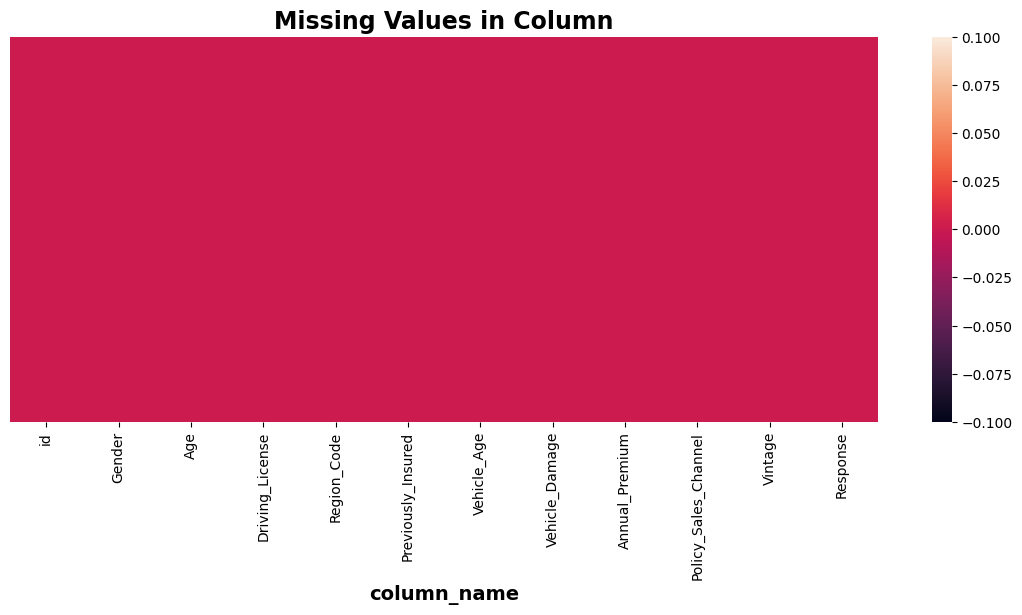

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

* The dataset cointains customer and their vehicles information of a vehicles insurance company, and our aim to Predict whether a customer would be interested in Vehicle Insurance.
* There are not any null and duplicate value in the dataset.
* Dataset has 381109 entries with 12 features.
* Out of 12 features, 9 are numeric while 3 are of object type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description 

* **id :** Unique ID for the customer

* **Gender :** Gender of the customer

* **Age :** Age of the customer

* **Driving_License :** 0 = Customer does not have DL, 1 = Customer already has DL

* **Region_Code :** Unique code for the region of the customer

* **Previously_Insured :** 1 = Customer already has Vehicle Insurance, 0 = Customer doesn't have Vehicle Insurance

* **Vehicle_Age :** Age of the Vehicle

* **Vehicle_Damage :** 1 = Customer got his/her vehicle damaged in the past. 0 = Customer didn't get his/her vehicle damaged in the past.

* **Annual_Premium  :** The amount customer needs to pay as premium in the year

* **Policy Sales Channel :** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* **Vintage :** Number of Days, Customer has been associated with the company

* **Response :** 1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique().reset_index().rename(columns={'index':'Columns',0:'Unique values'})

,Columns,Unique values
0,id,381109
1,Gender,2
2,Age,66
3,Driving_License,2
4,Region_Code,53
5,Previously_Insured,2
6,Vehicle_Age,3
7,Vehicle_Damage,2
8,Annual_Premium,48838
9,Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# make a function to extract categorical and numerical columns
def extract_cat_num(df):
  '''
  This function extract categorocal and Numerical columns in dataset
  '''
  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col,num_col

In [ ]:
# initialize objects cat_col and num_col  

cat_col,num_col=extract_cat_num(df)

In [ ]:
# fetch categorical columns
cat_col

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
# fetch unique value in categorical feature columns

for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

Gender has ['Male' 'Female'] values


Vehicle_Age has ['> 2 Years' '1-2 Year' '< 1 Year'] values


Vehicle_Damage has ['Yes' 'No'] values




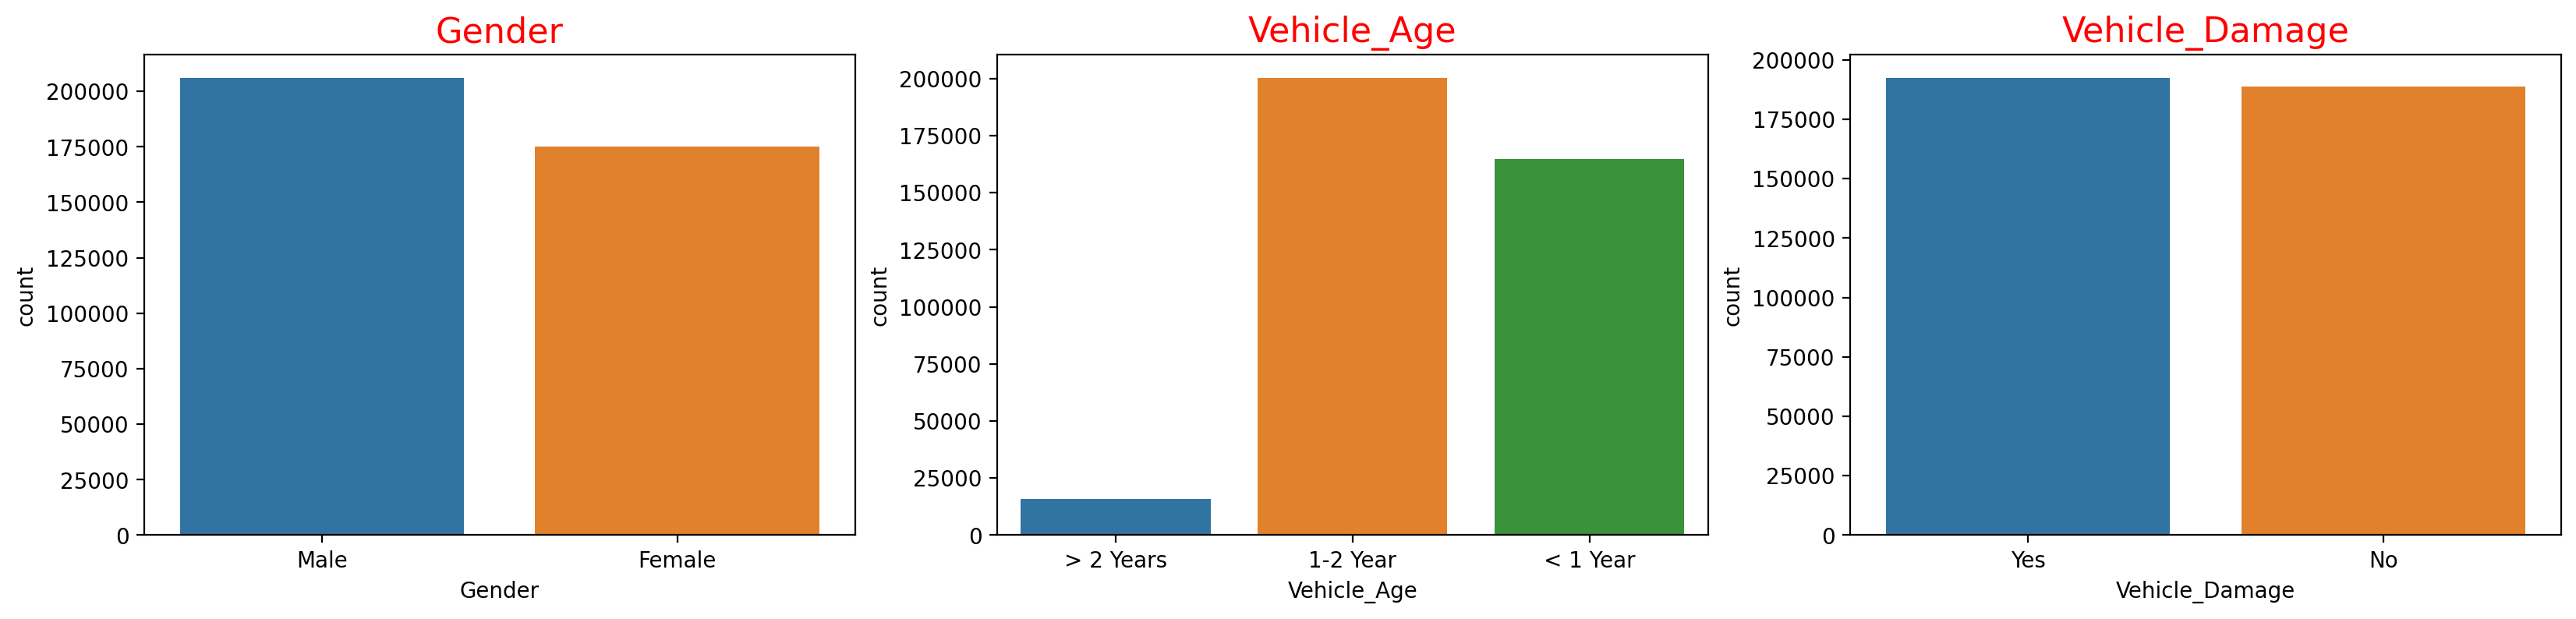

In [ ]:
plt.figure(figsize=(20,4),dpi=200)

for i,feature in enumerate(cat_col):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[feature])
  plt.title(feature,fontsize=16,color='red')

In [ ]:
# fetch numerical columns 
num_col

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

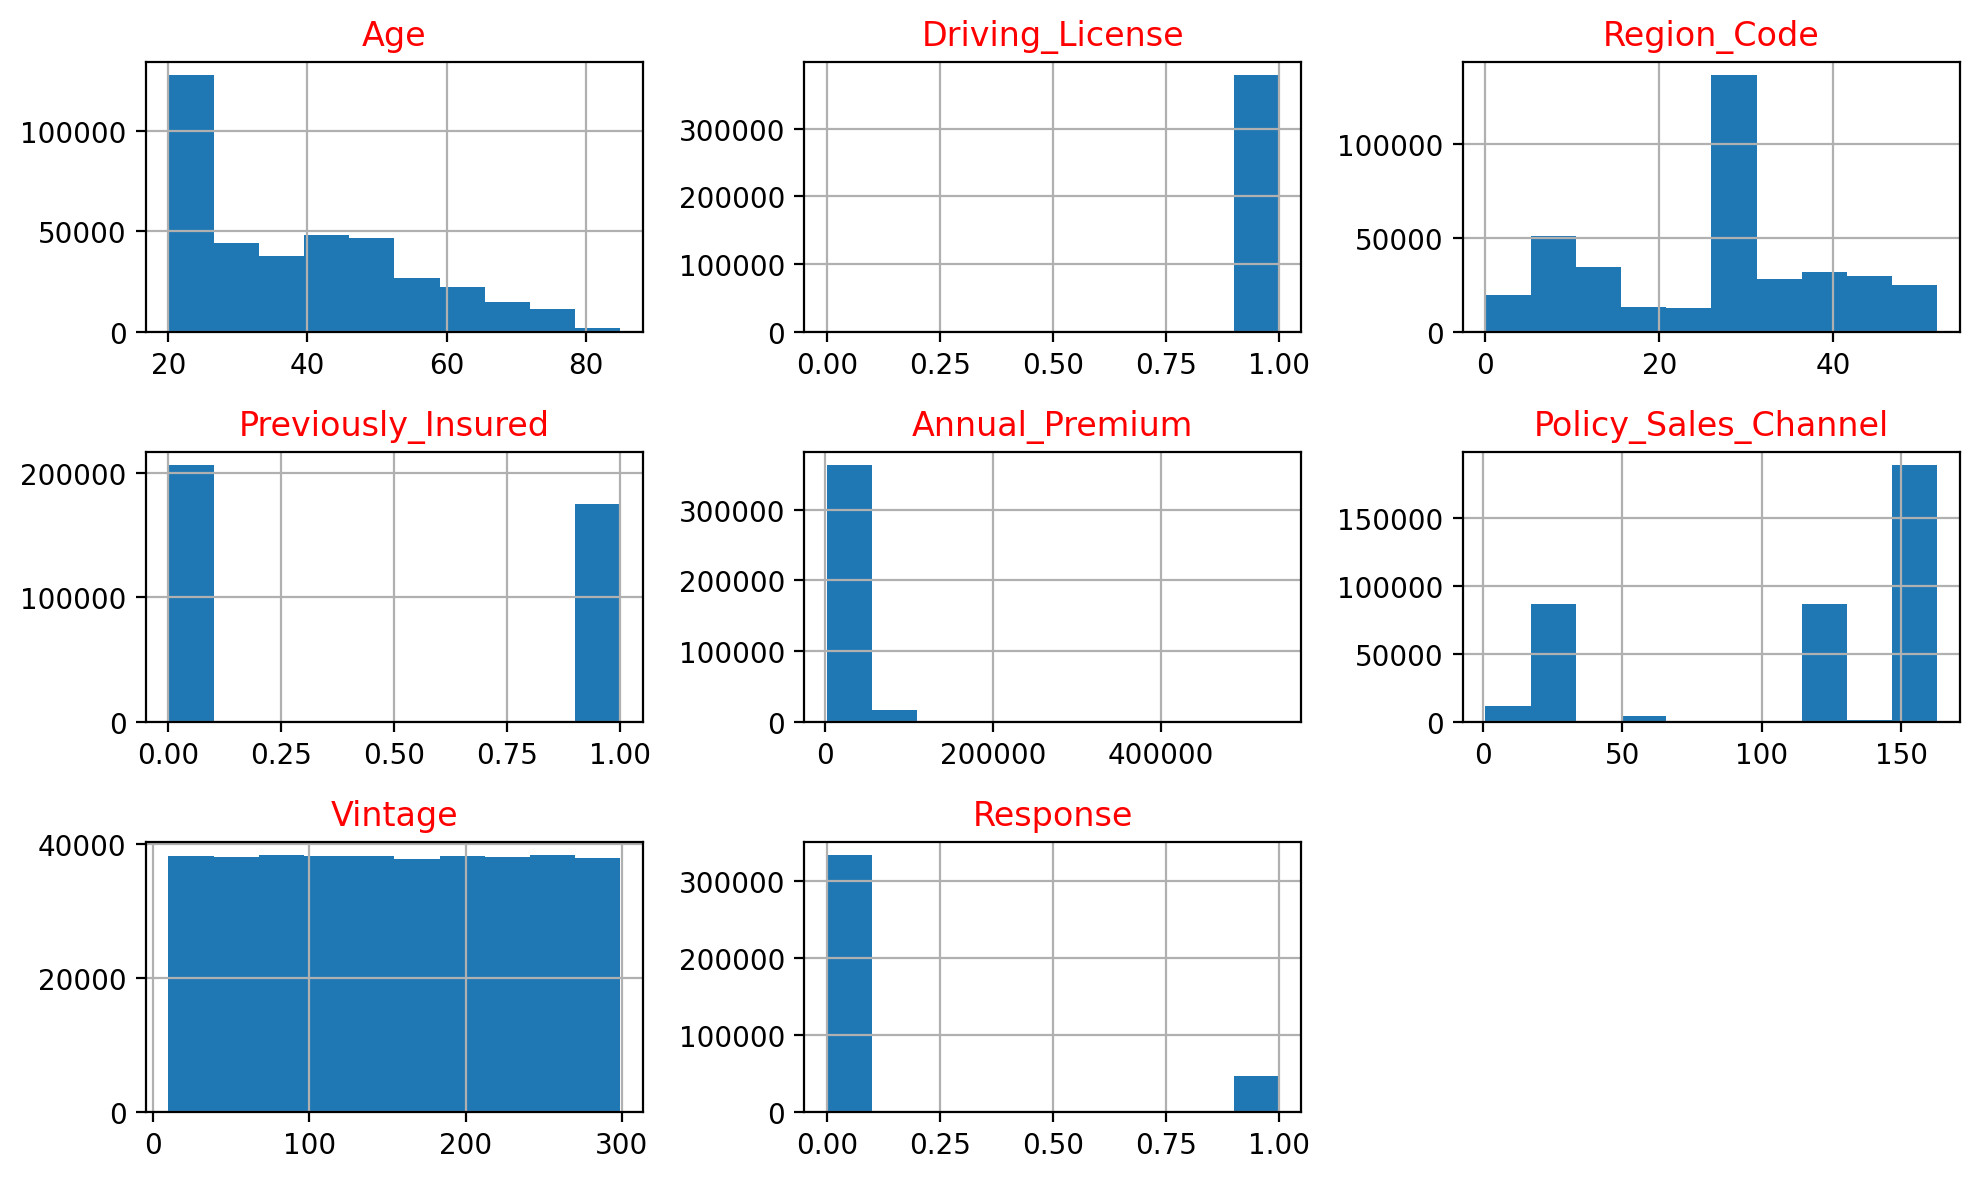

In [ ]:
# Visualization of Numeric columns

plt.figure(figsize=(10,6),dpi=200)

for i,feature in enumerate(num_col):
  plt.subplot(3,3,i+1)
  df[feature].hist()
  plt.title(feature, fontsize=12,color='red')
  plt.tight_layout()

In [ ]:
# check data types 
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### What all manipulations have you done and insights you found?


* All attributes don't have any discrepancy, so no need to correct any attribute column.
* Categorical columns are: Gender, Vehicle_Age, Vehicle_Damage 
* Numerical columns are: Age, driving_License, Response Previously_InsuredRegion_Code, Annual_Premium, Policy_Sales_Channel, Vintage
* Response attribute is our Output 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    334399
1     46710
Name: Response, dtype: int64

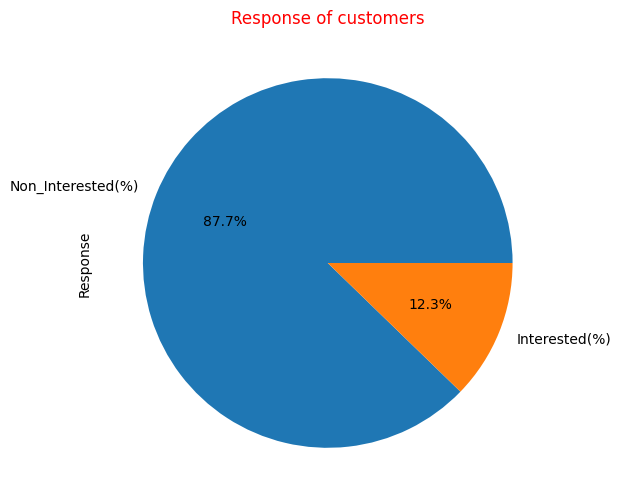

In [ ]:
# Chart - 1 visualization code

# Dependant Variable Column Visualization
df['Response'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%",shadow=False,labels=['Non_Interested(%)','Interested(%)'])
plt.title('Response of customers',color='red');

# count of Target variable
df['Response'].value_counts()

##### 1. Why did you pick the specific chart?

* A pie chart is a useful tool to display the distribution of various categories in a dataset. By dividing the circle into proportional sections, each representing a different category, the pie chart allows for a clear comparison of the relative size of each category. The use of different colors for each section further enhances the clarity of the representation and makes it easier to understand and interpret the data.

##### 2. What is/are the insight(s) found from the chart?

* The data shows that a large majority (87.7%) of customers are not interested, while a smaller portion (12.3%) are interested. The response variable is imbalanced with more instances of "not interested" than "interested".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It depends on the specific business scenario and the insights that were gained from the pie chart. The pie chart provides information on the proportion of different categories in a dataset, but it is up to the business to use that information in a meaningful way to drive positive impact. 
* For example, if the pie chart showed a large proportion of customers who were not interested, the business could use that information to identify areas for improvement and increase customer engagement. On the other hand, if the pie chart showed a large proportion of customers who were interested, the business could capitalize on that by focusing on maintaining and growing that customer base. 
* Ultimately, the impact will depend on how the insights are applied and acted upon by the business.

#### Chart - 2

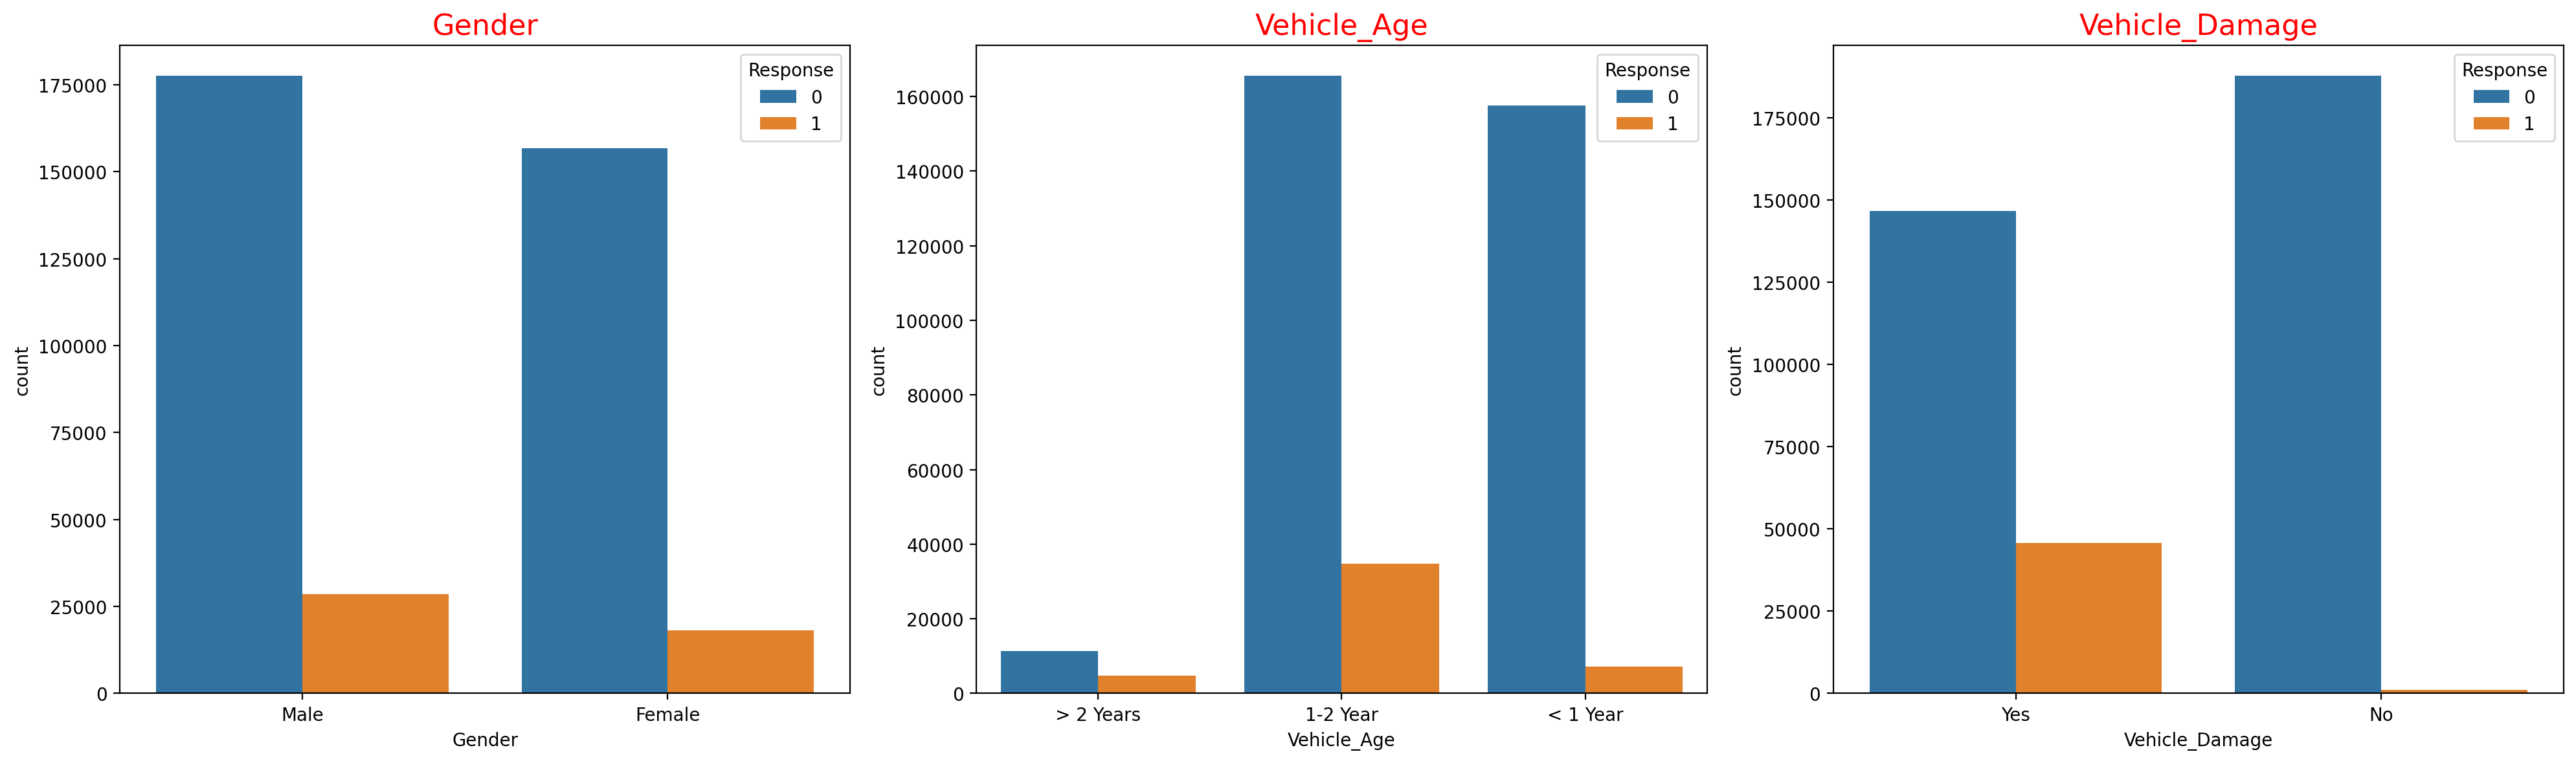

In [ ]:
# Chart - 2 visualization code

# Analysing the distribution of categorical variables in the dataset

plt.figure(figsize=(20,6),dpi=200)

for i, feature in enumerate(cat_col):
  plt.subplot(1, len(cat_col), i+1)
  sns.countplot(x=df[feature], hue='Response', data=df)
  plt.title(feature, fontsize=16, color='red')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?


* A count plot, also referred to as a bar plot, is a visualization technique that displays the frequency of each category in a categorical or nominal variable. The frequency counts are represented as bars, making it simple to understand the distribution of values in the dataset. Furthermore, the y-axis can be adjusted to show not just the count, but also other statistics such as the percentage of total values for each category. This additional information helps to provide deeper insights into the data and facilitates easy comparison of the proportions of different categories.

##### 2. What is/are the insight(s) found from the chart?

The code creates a figure with subplots for each feature in cat_col, and the bar plots show the count of each category in the feature colored by the target variable Response. 
* The statement "Male are more interested in vehicle insurance than female" can be confirmed by checking the count of males and females in the bar plot of the feature representing gender. 
* The statement "In term of vehicle_age, vehicle_age of 1-2 year are more interested in insurance followed by < 1 year and >2 years" can be confirmed by checking the count of each vehicle age category in the bar plot of the feature representing vehicle age. 
* The statement "Customers having Vehicle_damage are more interested in insurance" can be confirmed by checking the count of customers with and without vehicle damage in the bar plot of the feature representing vehicle damage.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*  If the goal is to target customers who are more likely to purchase insurance.
* The insights gained from the plots indicating that male customers and customers with 1-2 year old vehicles are more interested in insurance could inform targeted marketing efforts. 

#### Chart - 3

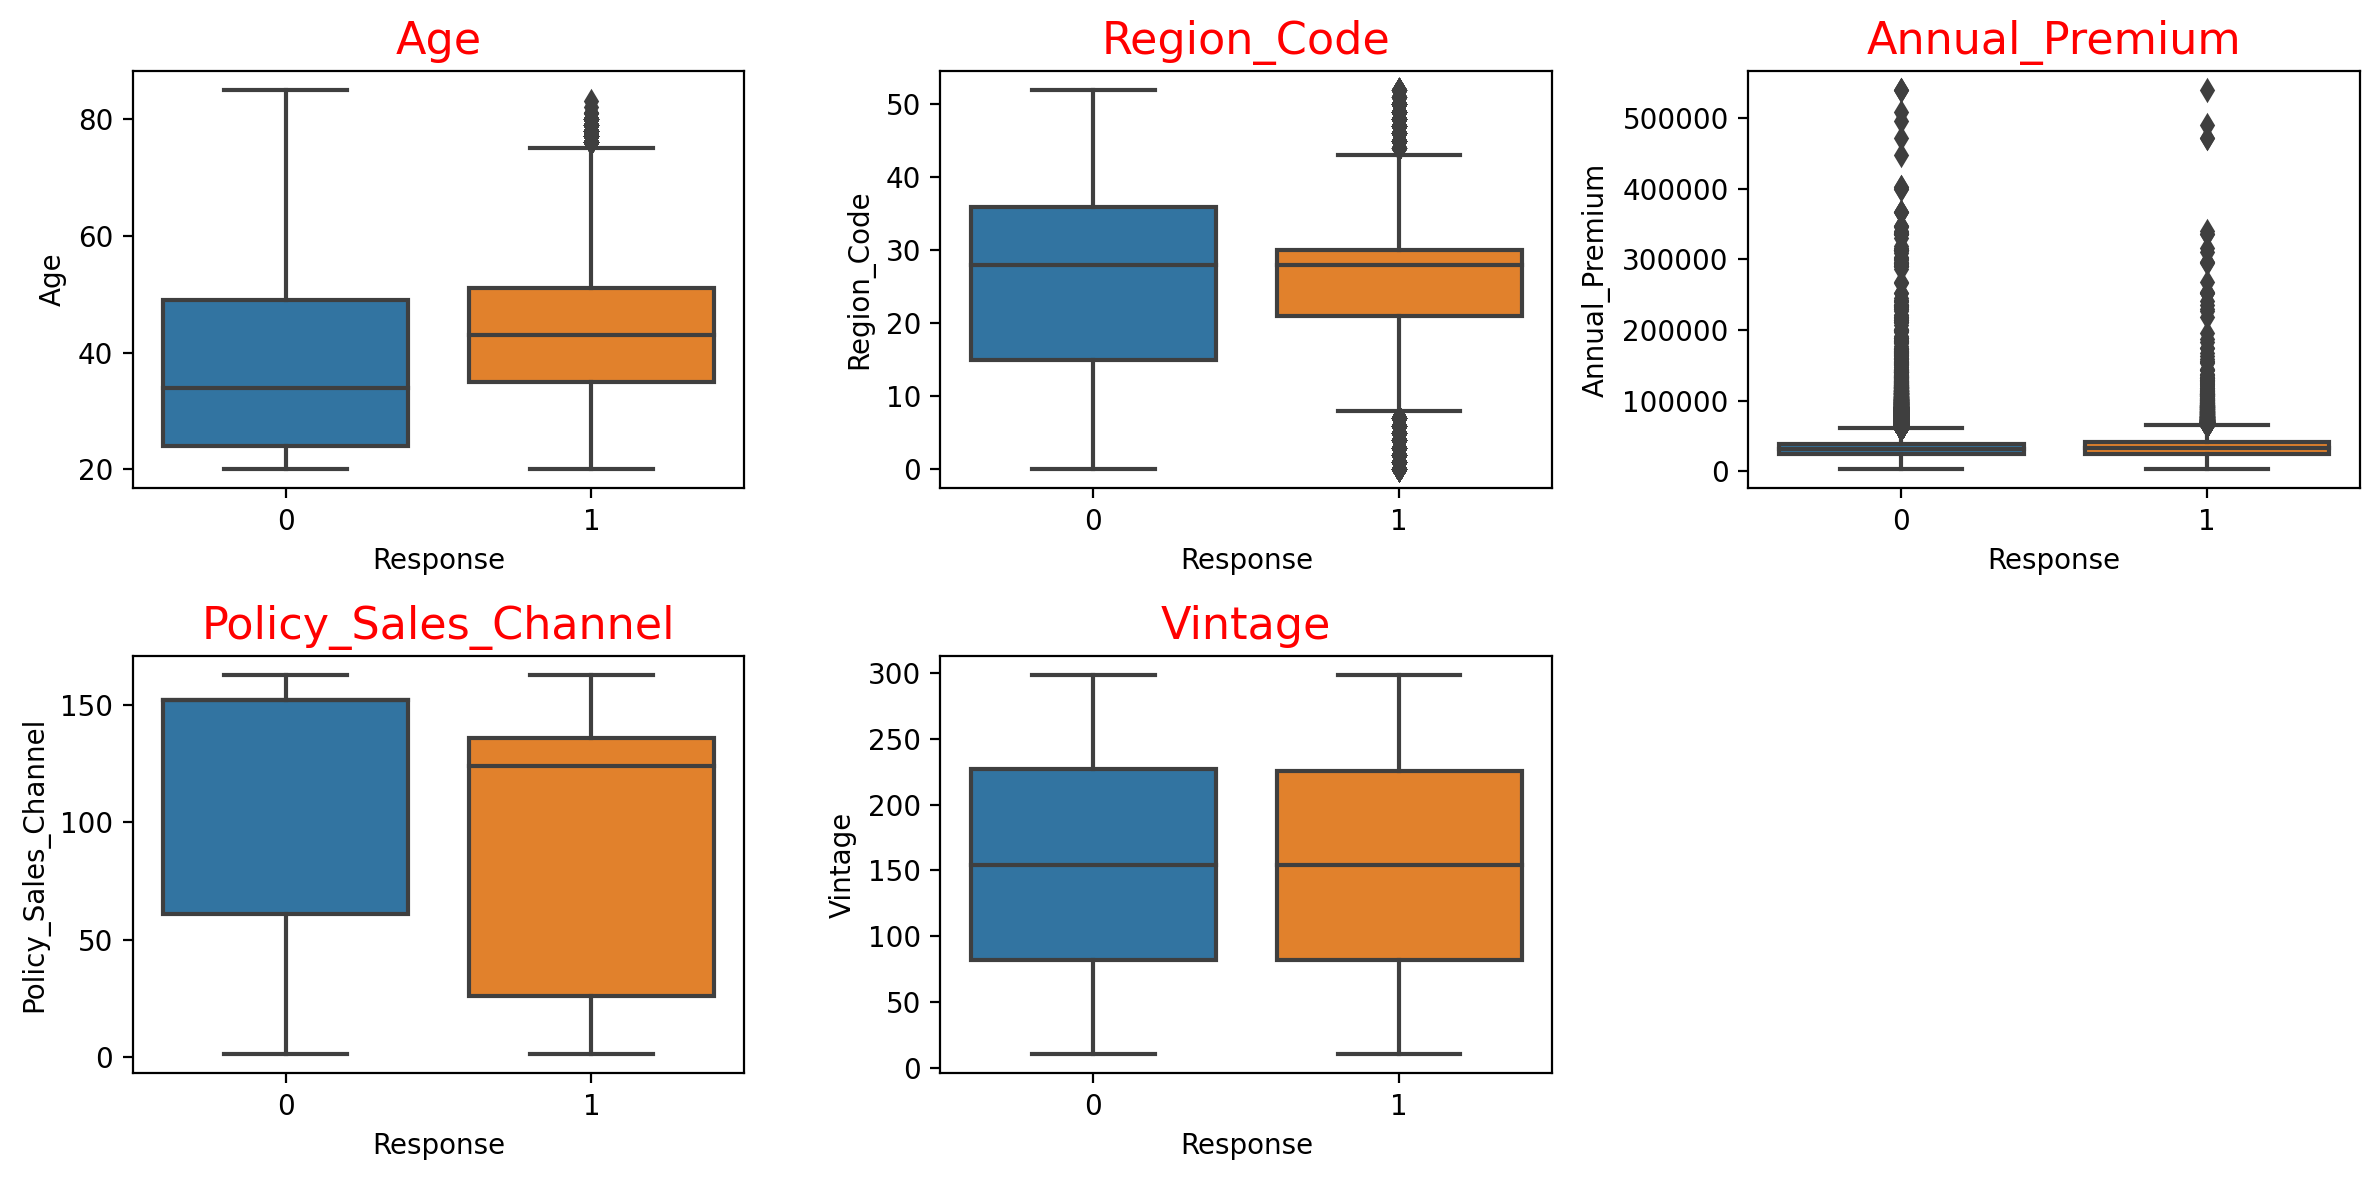

In [ ]:
# Chart - 3 visualization code

# checking Outliers in numeric features using seaborn boxplot

# list of continuous columns in dataset

list=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

plt.figure(figsize=(12,6), dpi=200)

for i, feature in enumerate(list):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Response', y=df[feature], data=df)
    plt.title(feature, fontsize=16, color='red')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

* A box plot, or box and whisker plot, is a visualization technique used to show the distribution of continuous data, not categorical data. The plot displays information about the shape of the distribution, including the median, quartiles, and outliers. The box of the plot displays the interquartile range (IQR), which represents the range between the first and third quartiles (25th and 75th percentiles), while the whiskers extend to the minimum and maximum values, excluding outliers. Outliers are plotted as individual points outside of the whiskers.

* The box plot provides a concise summary of the data, making it useful for comparing distributions across different groups or for identifying potential outliers or skewness in the data. However, it is not suitable for visualizing categorical or nominal data. For categorical data, you would typically use a bar plot instead.

##### 2. What is/are the insight(s) found from the chart?

This code creates a figure with multiple subplots, each showing the relationship between a continuous feature and the target variable Response. The sns.boxplot function is used to plot the features, with the box plot showing any potential outliers in the data. The target variable Response is used to color the boxes, allowing for a visual assessment of the relationship between the feature and the target variable.

From the description, it seems that only the Annual_Premium feature has outliers, which may have an impact on the performance of machine learning algorithms. It's important to consider this when selecting or preprocessing features for modeling.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   The insights lead to informed decisions and effective strategies, they have the potential to drive positive business impact.

#### Chart - 4

<ipython-input-30-5e473725f87e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age', hue='Response', palette = 'Set2', shade=True, data=df)
<ipython-input-30-5e473725f87e>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Region_Code', hue='Response', palette = 'Set2', shade=True, data=df)
<ipython-input-30-5e473725f87e>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Annual_Premium', hue='Response', palette = 'Set2', shade=True, data=df)
<ipython-input-30-5e473725f87e>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please 

<Axes: xlabel='Vintage', ylabel='Density'>

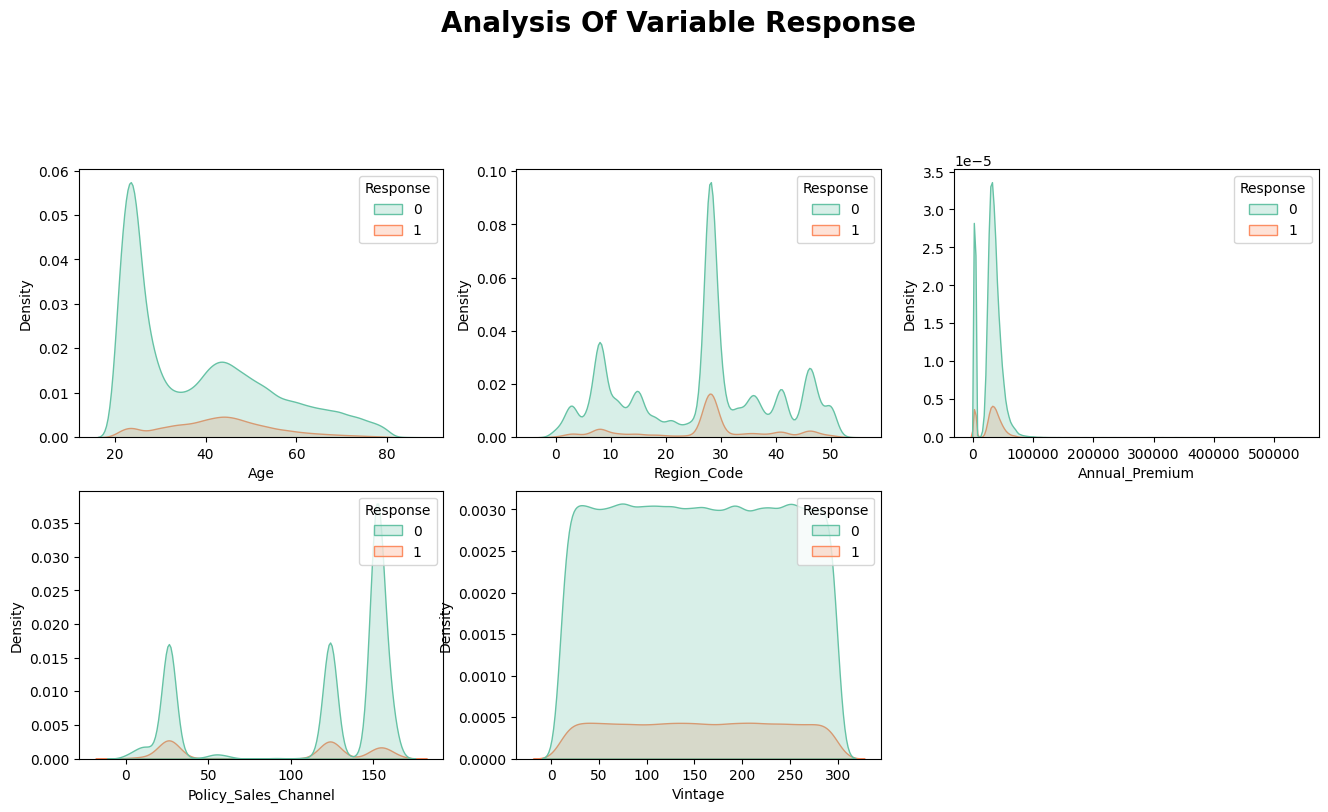

In [ ]:
# Chart - 4 visualization code

# Displot for all numerical col with Target variable
plt.figure(figsize = (16, 16))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(4,3,1)
sns.kdeplot(x='Age', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,2)
sns.kdeplot(x='Region_Code', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,3)
sns.kdeplot(x='Annual_Premium', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,4)
sns.kdeplot(x='Policy_Sales_Channel', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,5)
sns.kdeplot(x='Vintage', hue='Response', palette = 'Set2', shade=True, data=df)

##### 1. Why did you pick the specific chart?

* Display a univariate or bivariate distribution using a histogram, kernel density estimation, or rug plot. Displots are available in the seaborn library in Python and are useful for visualizing the distribution of data.

##### 2. What is/are the insight(s) found from the chart?

From this insights, we came to know that there are Age and Annual_premium are positively skewed.

#### Chart - 5

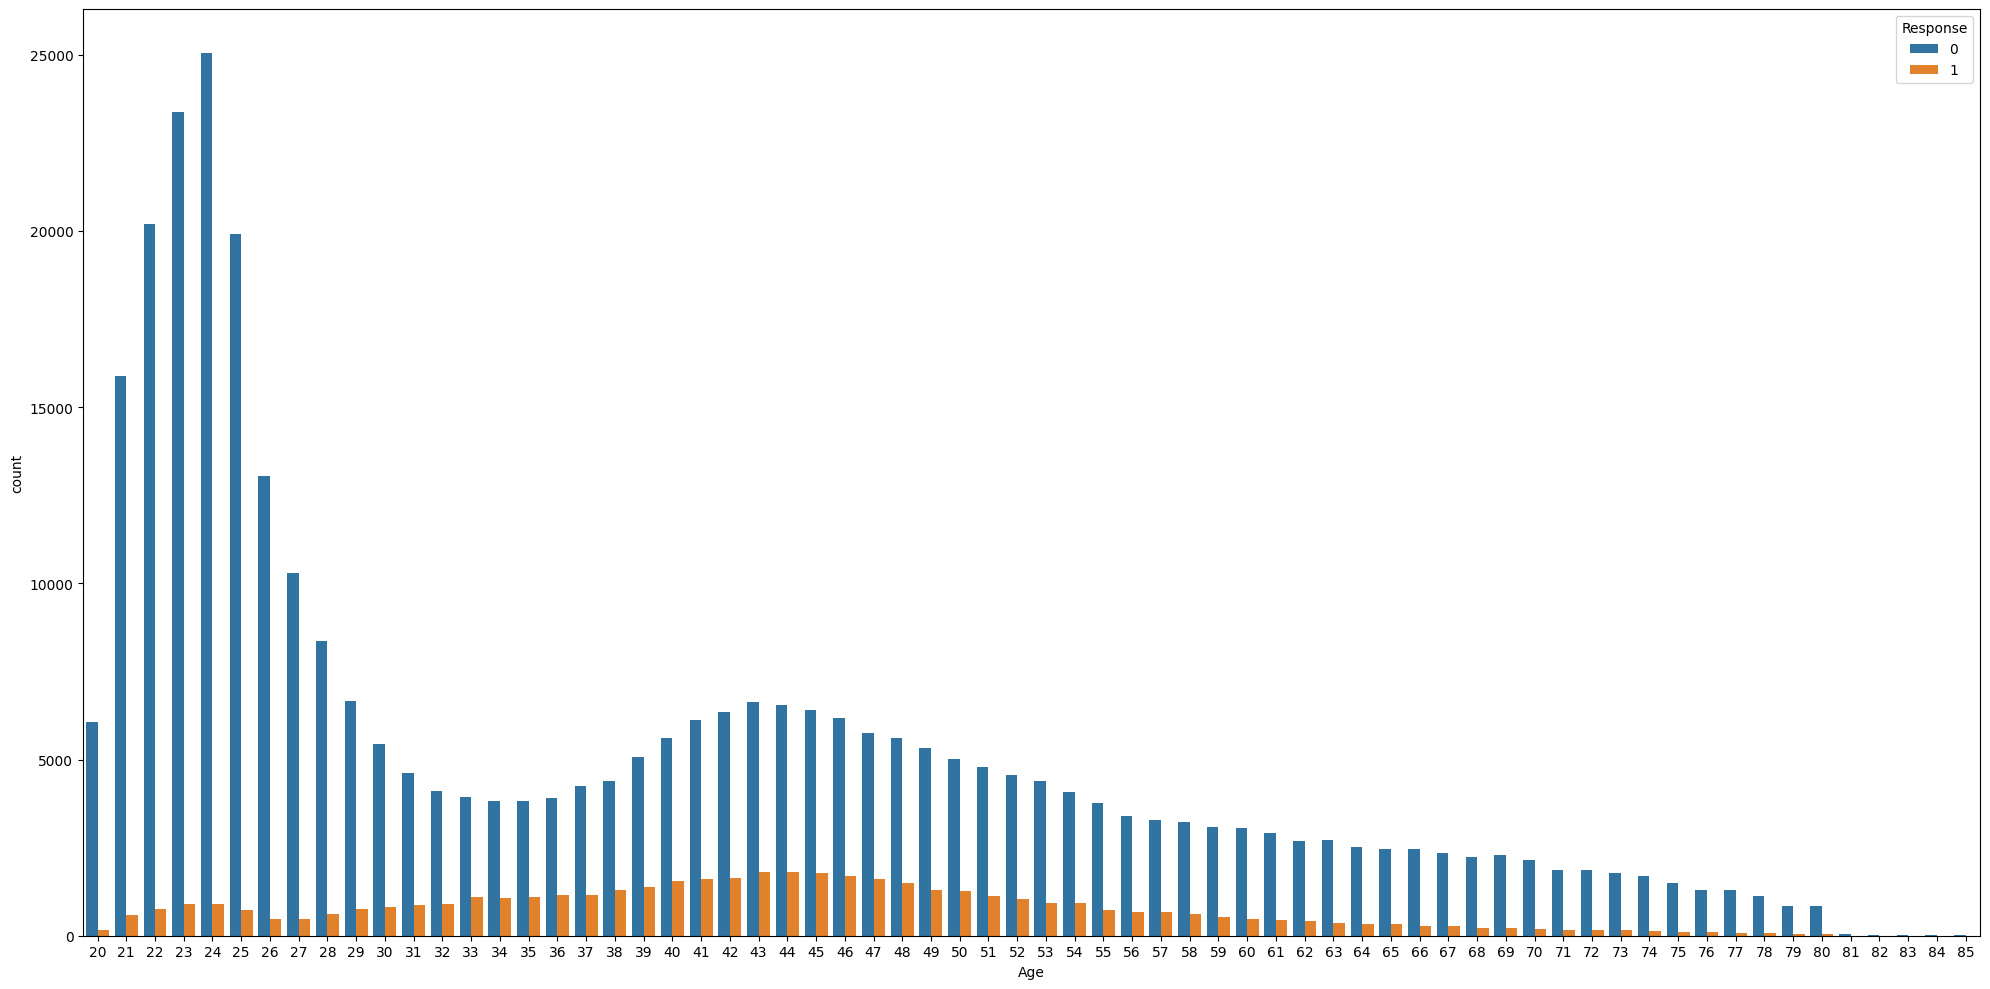

In [ ]:
# Chart - 5 visualization code

#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df);
plt.tight_layout()

##### 1. What is/are the insight(s) found from the chart?

This interpretation of the graph is based on the assumption that the height of the bars represents the number of people who are interested in vehicle insurance, and the x-axis categories represent different age groups. Based on the description given, it seems that the 20-30 age group has a higher count of people who are interested in vehicle insurance compared to 50+ age groups, although the 30-50 age group has the highest overall interest in vehicle insurance.

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   If the target audience for vehicle insurance is primarily in the 20-30 age and 30-50 age group.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***